SVR 33 features 0.20576478752 +- 0.173229643796
SVR wo gender info 0.204558232687 +- 0.173514370705
SVR wo averageness info 0.20484159527 +- 0.175639632242
SVR wo symmetry info 0.198447130693 +- 0.176515882595 

Ridge 33 features 0.187339269487 +- 0.168316203676
Ridge wo gender info 0.187339269487 +- 0.168316203676
Ridge wo averageness info 0.195783467715 +- 0.163060338552
Ridge wo symmetry info 0.182792996376 +- 0.162097273904 

K-nn 33 features -0.0574220389877 +- 0.271758117264
K-nn wo gender info -0.0574220389877 +- 0.271758117264
K-nn wo averageness info -0.0793959765539 +- 0.261839153355
K-nn wo symmetry info -0.0766576503489 +- 0.24065961443 

Extra trees 33 features 0.0940612780642 +- 0.199371085935
Extra trees wo gender info 0.118422616618 +- 0.180452507643
Extra trees wo averageness info 0.0796696554286 +- 0.197619583672
Extra trees wo symmetry info 0.0837815682872 +- 0.182516537728 

Linear regression 33 features 0.12717449525 +- 0.197837173744
Linear regression wo gender in

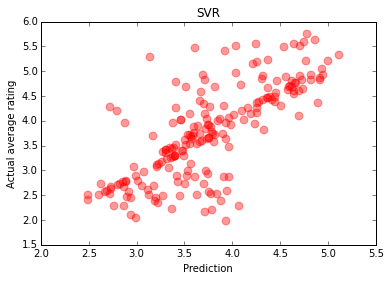

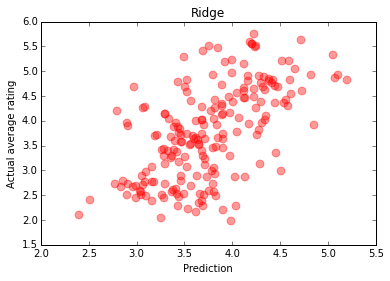

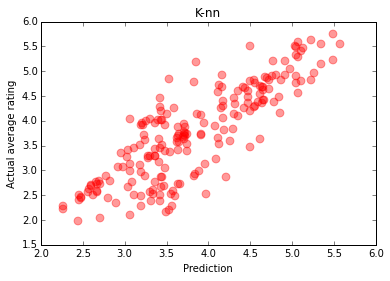

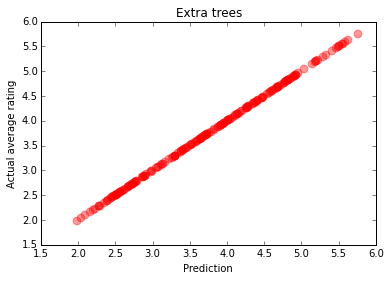

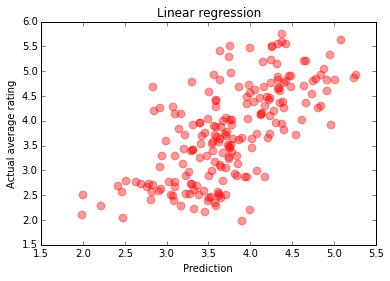

In [40]:
import numpy as np
from sklearn import preprocessing

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn import cross_validation
import matplotlib.pyplot as plt

%matplotlib inline

__author__ = 'amanda'


def preprocess_data():
    rating = np.load('./data_ready_to_use/clean_rating_data.npz')
    rating = rating['full_rating']
    average_rating = rating.mean(axis=0)

    feature_arr = np.load('./data_ready_to_use/clean_features.npz')
    feature_arr = feature_arr['feature_arr']

    gender_list = np.load('./data_ready_to_use/gender_list.npz')
    gender_list = gender_list['gender_list']

    gender_list = gender_list[:, np.newaxis]
    feature_arr = np.hstack((gender_list, feature_arr))
    feature_arr = preprocessing.scale(feature_arr)
    return average_rating, feature_arr

# Load the preprocessed data.
rating, feature_arr = preprocess_data()
ll = range(0, 30)
ll.append(32)
sub_feature = feature_arr[:, ll]

random_seed = 990
cv = cross_validation.ShuffleSplit(200, n_iter=100, test_size=0.15, random_state=random_seed)


# Fit estimators
ESTIMATORS = {"Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=20, random_state=0),
              "K-nn": KNeighborsRegressor(n_neighbors=2),
              "Linear regression": LinearRegression(),
              "Ridge": RidgeCV(), 
             "SVR": SVR()}

y_test_predict = dict()
y_overall_predict = dict()
for name, estimator in ESTIMATORS.items():
    
    # Plot the prediction vs actual rating using full data
    estimator.fit(feature_arr, rating)
    full_predict = estimator.predict(feature_arr)

    fig, ax = plt.subplots()
    plt.scatter(full_predict, rating, color='r', s=121/2, alpha=.4)
    plt.xlabel('Prediction')
    plt.ylabel('Actual average rating')
    plt.title(name)
    
    # calculate cross validation score (r2 score)
    a = cross_validation.cross_val_score(estimator, feature_arr, rating, cv=cv)
    print name, '33 features', a.mean(), '+-', a.std()
#     print name, a
    
#     b = cross_validation.cross_val_score(estimator, feature_arr[:, 1:], rating, cv=cv)
#     print name, 'wo gender info', b.mean(), '+-', b.std()
    
#     c = cross_validation.cross_val_score(estimator, feature_arr[:, :-1], rating, cv=cv)
#     print name, 'wo averageness info', c.mean(), '+-', c.std()
    
#     d = cross_validation.cross_val_score(estimator, sub_feature, rating, cv=cv)
#     print name, 'wo symmetry info', d.mean(), '+-', d.std(), '\n'